#Dataset: Indicators of Heart Disease 2022 with NaNs


##Importing Libraries

In [1]:
#Importing Libraries
from google.colab import drive # Mount the google drive for data loading
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

import tensorflow as tf












Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2. Data Preparation and Cleaning


###Importing the Dataset

In [2]:
#Importing the dataset from Google Drive and loading it into a dataframe called df
df = pd.read_csv("/content/drive/MyDrive/GroupProject/Data/heart_2022_with_nans.csv")

In [3]:
#Dimensions of the Dataset (Rows & Columns)
print(df.shape)

(445132, 40)


In [4]:
#First 5 entries of the dataset
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
#Finding out how many rows have null entries in them
print("Percentage of Records including Null entries: " + str(round((1-len(df.dropna())/len(df))*100,0))+"%")
print("Count of Records including Null entries: " + str(len(df)-len(df.dropna())))


Percentage of Records including Null entries: 45.0%
Count of Records including Null entries: 199110


In [6]:
#Finding out how many null entries are there in for each variable
print(df.isna().sum())

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

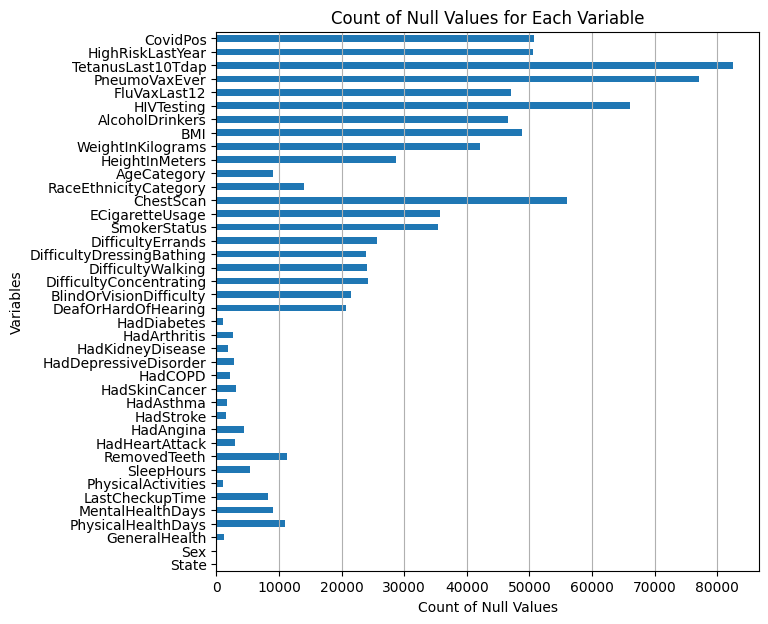

In [7]:
# Calculate the number of null values for each variable
null_counts_per_column = df.isnull().sum()

# Plot the count of nulls for each variable
plt.figure(figsize=(7, 7))
null_counts_per_column.plot(kind='barh')
plt.xlabel('Count of Null Values')
plt.ylabel('Variables')
plt.title('Count of Null Values for Each Variable')
plt.grid(axis='x')
plt.show()

In [8]:
#Data Imbalance based on the target variable 'HadHeartAttack'

# Data Split in Absolute Numbers
print(df['HadHeartAttack'].value_counts())

# Data Split by proportion/percentage
print((df['HadHeartAttack'].value_counts()/len(df)*100).round(0))

HadHeartAttack
No     416959
Yes     25108
Name: count, dtype: int64
HadHeartAttack
No     94.0
Yes     6.0
Name: count, dtype: float64


In [9]:
#Dropping the records with null entries in them
df = df.dropna()

In [10]:
#Data Imbalance based on the target variable 'HadHeartAttack' after removing nulls

# Data Split in Absolute Numbers
print(df['HadHeartAttack'].value_counts())

# Data Split by proportion/percentage
print((df['HadHeartAttack'].value_counts()/len(df)*100).round(0))

HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64
HadHeartAttack
No     95.0
Yes     5.0
Name: count, dtype: float64


###Unique entries and DataTypes of each column

In [11]:
# Create a DataFrame to store data types and number of unique entries
data_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Unique Entries': df.nunique()
})

# Filter variables with fewer than 55 unique entries
variables_with_few_unique_entries = data_info[data_info['Unique Entries'] < 55].index

# Create a new column to store unique entries for variables with fewer than 55 unique entries
data_info['Unique Entries (<=55)'] = [df[col].unique() if col in variables_with_few_unique_entries else None for col in df.columns]

# Display the DataFrame
print(data_info)


                          Data Type  Unique Entries  \
State                        object              54   
Sex                          object               2   
GeneralHealth                object               5   
PhysicalHealthDays          float64              31   
MentalHealthDays            float64              31   
LastCheckupTime              object               4   
PhysicalActivities           object               2   
SleepHours                  float64              23   
RemovedTeeth                 object               4   
HadHeartAttack               object               2   
HadAngina                    object               2   
HadStroke                    object               2   
HadAsthma                    object               2   
HadSkinCancer                object               2   
HadCOPD                      object               2   
HadDepressiveDisorder        object               2   
HadKidneyDisease             object               2   
HadArthrit



###Changing the categorical variables to integers

In [12]:
#For simplicity changing the entries in the columns HadDiabetes, TetanusLast10Tdap and CovidPos to 0 and 1
mapping = {'Yes': 1, 'No': 0, 'No, pre-diabetes or borderline diabetes': 0, 'Yes, but only during pregnancy (female)': 1}
df['HadDiabetes'] = df['HadDiabetes'].replace(mapping).astype(int)

mapping = {'Yes, received Tdap': 1, 'Yes, received tetanus shot but not sure what type': 1, 'No, did not receive any tetanus shot in the past 10 years': 0, 'Yes, received tetanus shot, but not Tdap': 1}
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].replace(mapping).astype(int)

mapping = {'No': 0, 'Yes': 1,'Tested positive using home test without a health professional': 1}
df['CovidPos'] = df['CovidPos'].replace(mapping).astype(int)


#Changing the rest of the binary variables to Integers i.e., 0 and 1
df["PhysicalActivities"] = df["PhysicalActivities"].replace({"Yes": 1, "No": 0}).astype(int)
df["Sex"] = df["Sex"].replace({"Male": 1, "Female": 0}).astype(int)
df["PhysicalActivities"] = df["PhysicalActivities"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadHeartAttack"] = df["HadHeartAttack"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadAngina"] = df["HadAngina"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadStroke"] = df["HadStroke"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadAsthma"] = df["HadAsthma"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadSkinCancer"] = df["HadSkinCancer"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadCOPD"] = df["HadCOPD"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadDepressiveDisorder"] = df["HadDepressiveDisorder"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadKidneyDisease"] = df["HadKidneyDisease"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadArthritis"] = df["HadArthritis"].replace({"Yes": 1, "No": 0}).astype(int)
df["DeafOrHardOfHearing"] = df["DeafOrHardOfHearing"].replace({"Yes": 1, "No": 0}).astype(int)
df["BlindOrVisionDifficulty"] = df["BlindOrVisionDifficulty"].replace({"Yes": 1, "No": 0}).astype(int)
df["DifficultyConcentrating"] = df["DifficultyConcentrating"].replace({"Yes": 1, "No": 0}).astype(int)
df["DifficultyWalking"] = df["DifficultyWalking"].replace({"Yes": 1, "No": 0}).astype(int)
df["DifficultyDressingBathing"] = df["DifficultyDressingBathing"].replace({"Yes": 1, "No": 0}).astype(int)
df["DifficultyErrands"] = df["DifficultyErrands"].replace({"Yes": 1, "No": 0}).astype(int)
df["ChestScan"] = df["ChestScan"].replace({"Yes": 1, "No": 0}).astype(int)
df["AlcoholDrinkers"] = df["AlcoholDrinkers"].replace({"Yes": 1, "No": 0}).astype(int)
df["HIVTesting"] = df["HIVTesting"].replace({"Yes": 1, "No": 0}).astype(int)
df["FluVaxLast12"] = df["FluVaxLast12"].replace({"Yes": 1, "No": 0}).astype(int)
df["PneumoVaxEver"] = df["PneumoVaxEver"].replace({"Yes": 1, "No": 0}).astype(int)
df["HighRiskLastYear"] = df["HighRiskLastYear"].replace({"Yes": 1, "No": 0}).astype(int)

#Moving the target column position to 0
had_heart_attack_column = df.pop("HadHeartAttack")
df.insert(0, "HadHeartAttack", had_heart_attack_column)

In [13]:
df.dtypes

HadHeartAttack                 int64
State                         object
Sex                            int64
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities             int64
SleepHours                   float64
RemovedTeeth                  object
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
HadDiabetes                    int64
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
SmokerStatus                  object
ECigaretteUsage               object
C

Data Transformation


In [14]:
# Replace values in the 'GenHealth' and 'AgeCategory'column using the mapping dictionary
mapping = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5}
df['GeneralHealth'] = df['GeneralHealth'].replace(mapping).astype(int)
mapping = {'Age 18 to 24': 1, 'Age 25 to 29': 2, 'Age 30 to 34': 3, 'Age 35 to 39': 4, 'Age 40 to 44': 5, 'Age 45 to 49': 6, 'Age 50 to 54': 7, 'Age 55 to 59': 8, 'Age 60 to 64': 9, 'Age 65 to 69': 10, 'Age 70 to 74': 11, 'Age 75 to 79': 12, 'Age 80 or older': 13}
df['AgeCategory'] = df['AgeCategory'].replace(mapping).astype(int)


#Replacing the categories in the variables SmokerStatus and ECigaretteUsage to integers
mapping = {'Never smoked': 0, 'Former smoker': 1, 'Current smoker - now smokes some days': 2, 'Current smoker - now smokes every day': 3}
df['SmokerStatus'] = df['SmokerStatus'].replace(mapping).astype(int)
mapping = {'Never used e-cigarettes in my entire life': 0, 'Not at all (right now)': 1, 'Use them some days': 2, 'Use them every day': 3}
df['ECigaretteUsage'] = df['ECigaretteUsage'].replace(mapping).astype(int)


#Changing the catgories in the columns LastCheckupTime and RemovedTeeth to integers
mapping = {'Within past year (anytime less than 12 months ago)': 3, '5 or more years ago': 0, 'Within past 2 years (1 year but less than 2 years ago)': 2, 'Within past 5 years (2 years but less than 5 years ago)': 1}
df['LastCheckupTime'] = df['LastCheckupTime'].replace(mapping).astype(int)
mapping = {'None of them': 0, '1 to 5': 1, '6 or more, but not all': 2 , 'All': 3}
df['RemovedTeeth'] = df['RemovedTeeth'].replace(mapping).astype(int)

In [15]:
# Replace values in the 'GenHealth' and 'AgeCategory'column using the mapping dictionary
mapping = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5}
df['GeneralHealth'] = df['GeneralHealth'].replace(mapping).astype(int)
mapping = {'Age 18 to 24': 1, 'Age 25 to 29': 2, 'Age 30 to 34': 3, 'Age 35 to 39': 4, 'Age 40 to 44': 5, 'Age 45 to 49': 6, 'Age 50 to 54': 7, 'Age 55 to 59': 8, 'Age 60 to 64': 9, 'Age 65 to 69': 10, 'Age 70 to 74': 11, 'Age 75 to 79': 12, 'Age 80 or older': 13}
df['AgeCategory'] = df['AgeCategory'].replace(mapping).astype(int)

#Replacing the categories in the variables SmokerStatus and ECigaretteUsage to integers
mapping = {'Never smoked': 0, 'Former smoker': 1, 'Current smoker - now smokes some days': 2, 'Current smoker - now smokes every day': 3}
df['SmokerStatus'] = df['SmokerStatus'].replace(mapping).astype(int)
mapping = {'Never used e-cigarettes in my entire life': 0, 'Not at all (right now)': 1, 'Use them some days': 2, 'Use them every day': 3}
df['ECigaretteUsage'] = df['ECigaretteUsage'].replace(mapping).astype(int)

#Changing the catgories in the columns LastCheckupTime and RemovedTeeth to integers
mapping = {'Within past year (anytime less than 12 months ago)': 3, '5 or more years ago': 0, 'Within past 2 years (1 year but less than 2 years ago)': 2, 'Within past 5 years (2 years but less than 5 years ago)': 1}
df['LastCheckupTime'] = df['LastCheckupTime'].replace(mapping).astype(int)
mapping = {'None of them': 0, '1 to 5': 1, '6 or more, but not all': 2 , 'All': 3}
df['RemovedTeeth'] = df['RemovedTeeth'].replace(mapping).astype(int)

#Moving the target column position to 0
had_heart_attack_column = df.pop("HadHeartAttack")
df.insert(0, "HadHeartAttack", had_heart_attack_column)

#Performing label encoding on the variable State to turn it into integer
label_encoder_state = LabelEncoder()
df['State'] = label_encoder_state.fit_transform(df['State'])

#Performing label encoding on the variable Race to turn it into integer
label_encoder_race = LabelEncoder()
df['RaceEthnicityCategory'] = label_encoder_race.fit_transform(df['RaceEthnicityCategory'])

## Printing out the final csv file to be used from now on in the project

In [16]:
df.to_csv("/content/drive/MyDrive/heart_2022_with_nans_2_Data_Prep_&_Cleaning.csv", index=False)

------------ END OF DATA PREPARATION ----------------------------


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/heart_2022_with_nans_2_Data_Prep_&_Cleaning.csv")

###Radar for Binary Variables

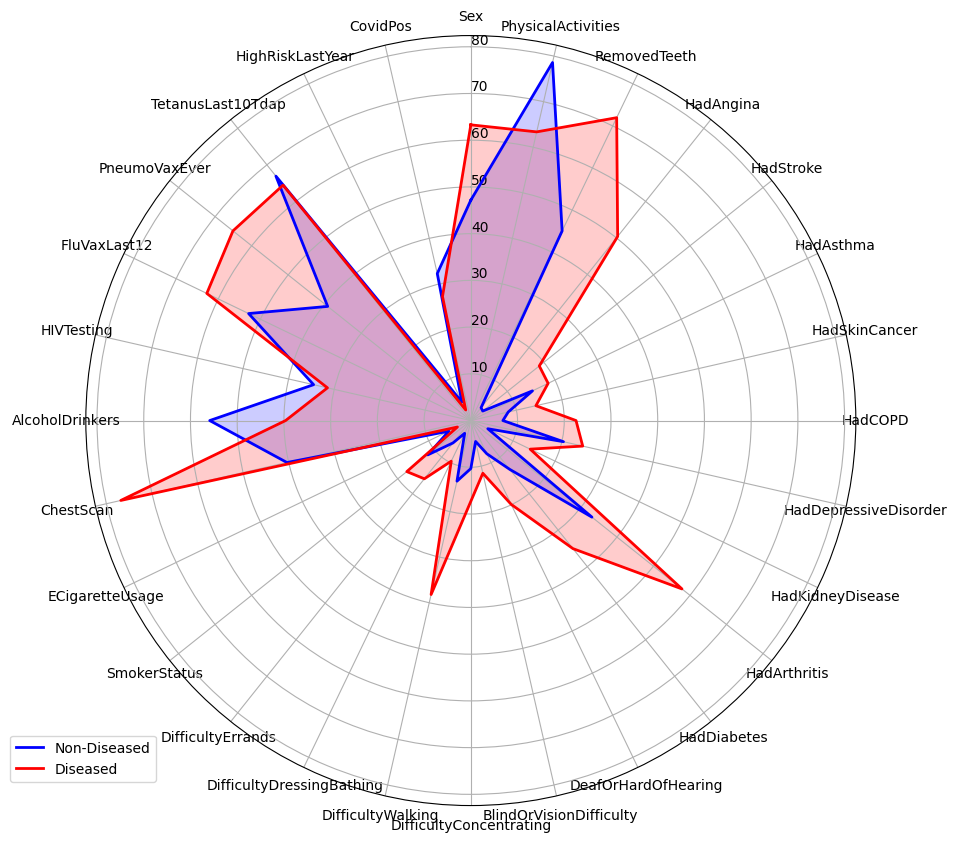

In [18]:

# Separate data for diseased and non-diseased
df_radar = df

#RemovedTeeth to Binary
mapping = {0:0, 1:1, 2:1 , 3:1}
df_radar['RemovedTeeth'] = df_radar['RemovedTeeth'].replace(mapping).astype(int)

#SmokerStatus to Binary
mapping = {0:0, 1:0, 2:1 , 3:1}
df_radar['SmokerStatus'] = df_radar['SmokerStatus'].replace(mapping).astype(int)

#ECigare to Binary
mapping = {0:0, 1:0, 2:1 , 3:1}
df_radar['ECigaretteUsage'] = df_radar['ECigaretteUsage'].replace(mapping).astype(int)

df_diseased = df_radar[df_radar["HadHeartAttack"] == 1]
df_non_diseased = df_radar[df_radar["HadHeartAttack"] == 0]

categories = []
for column in df_radar.columns[:]:
  if(df_radar[column].nunique() == 2 and column != "HadHeartAttack"):
    categories.append(column)

# Number of variables
#categories = ['Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Smoking', 'AlcoholDrinking']

# Number of variables
N = len(categories)

# Angle for each category
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Create subplots
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot non-diseased data
values = df_non_diseased[categories].mean().values.tolist()
values = [x * 100 for x in values]
values += values[:1]
ax.plot(angles, values, color='blue', linewidth=2, linestyle='solid', label='Non-Diseased')
ax.fill(angles, values, color='blue', alpha=0.2)

# Plot diseased data
values = df_diseased[categories].mean().values.tolist()
values = [x * 100 for x in values]
values += values[:1]
ax.plot(angles, values, color='red', linewidth=2, linestyle='solid', label='Diseased')
ax.fill(angles, values, color='red', alpha=0.2)

# Add labels
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Add labels for each variable
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Show the plot
plt.show()


###Scatter & Histograms

In [ ]:
#DataPrep for Scatter & Histograms
#df_scatter = df[['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'SmokerStatus', 'ECigaretteUsage', 'AgeCategory', 'HadHeartAttack']]
df_scatter = df[['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AgeCategory', 'HadHeartAttack']]
X = df_scatter.drop(columns=['HadHeartAttack'])  # Features
y = df_scatter['HadHeartAttack']  # Target

# Instantiate RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Apply RandomOverSampler to generate oversampled data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with balanced classes
df_scatter = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='HadHeartAttack')], axis=1)
df_scatter = df_scatter.sample(frac = 0.1, random_state=42)
sns.pairplot(df_scatter, hue="HadHeartAttack")

In [ ]:


df_kmeans = df.sample(frac=0.1, random_state=42)

# Select columns for clustering
cols_for_cluster = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AgeCategory']

# Select relevant columns from the DataFrame
X = df_kmeans[cols_for_cluster]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df_kmeans['Cluster'] = kmeans.fit_predict(X_scaled)

# Create a scatter plot of the variables with color representing the cluster
sns.pairplot(df_kmeans, hue='Cluster', vars=cols_for_cluster, diag_kind='kde', palette='Dark2')
plt.suptitle('Pairplot of Variables with K-means Clusters', y=1.02)
plt.show()


###Changing the variables to integers

In [ ]:
# Replace values in the 'GenHealth' and 'AgeCategory'column using the mapping dictionary
mapping = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5}
df['GeneralHealth'] = df['GeneralHealth'].replace(mapping).astype(int)
mapping = {'Age 18 to 24': 1, 'Age 25 to 29': 2, 'Age 30 to 34': 3, 'Age 35 to 39': 4, 'Age 40 to 44': 5, 'Age 45 to 49': 6, 'Age 50 to 54': 7, 'Age 55 to 59': 8, 'Age 60 to 64': 9, 'Age 65 to 69': 10, 'Age 70 to 74': 11, 'Age 75 to 79': 12, 'Age 80 or older': 13}
df['AgeCategory'] = df['AgeCategory'].replace(mapping).astype(int)

#Replacing the categories in the variables SmokerStatus and ECigaretteUsage to integers
mapping = {'Never smoked': 0, 'Former smoker': 1, 'Current smoker - now smokes some days': 2, 'Current smoker - now smokes every day': 3}
df['SmokerStatus'] = df['SmokerStatus'].replace(mapping).astype(int)

mapping = {'Never used e-cigarettes in my entire life': 0, 'Not at all (right now)': 1, 'Use them some days': 2, 'Use them every day': 3}
df['ECigaretteUsage'] = df['ECigaretteUsage'].replace(mapping).astype(int)

#For simplicity changing the entries in the columns HadDiabetes, TetanusLast10Tdap and CovidPos to 0 and 1
mapping = {'Yes': 1, 'No': 0, 'No, pre-diabetes or borderline diabetes': 0, 'Yes, but only during pregnancy (female)': 1}
df['HadDiabetes'] = df['HadDiabetes'].replace(mapping).astype(int)

mapping = {'Yes, received Tdap': 1, 'Yes, received tetanus shot but not sure what type': 1, 'No, did not receive any tetanus shot in the past 10 years': 0, 'Yes, received tetanus shot, but not Tdap': 1}
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].replace(mapping).astype(int)

mapping = {'No': 0, 'Yes': 1,'Tested positive using home test without a health professional': 1}
df['CovidPos'] = df['CovidPos'].replace(mapping).astype(int)

#Changing the catgories in the columns LastCheckupTime and RemovedTeeth to integers
mapping = {'Within past year (anytime less than 12 months ago)': 3, '5 or more years ago': 0, 'Within past 2 years (1 year but less than 2 years ago)': 2, 'Within past 5 years (2 years but less than 5 years ago)': 1}
df['LastCheckupTime'] = df['LastCheckupTime'].replace(mapping).astype(int)

mapping = {'None of them': 0, '1 to 5': 1, '6 or more, but not all': 2 , 'All': 3}
df['RemovedTeeth'] = df['RemovedTeeth'].replace(mapping).astype(int)

#Changing the rest of the binary variables to Integers i.e., 0 and 1
df["PhysicalActivities"] = df["PhysicalActivities"].replace({"Yes": 1, "No": 0}).astype(int)
df["Sex"] = df["Sex"].replace({"Male": 1, "Female": 0}).astype(int)
df["PhysicalActivities"] = df["PhysicalActivities"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadHeartAttack"] = df["HadHeartAttack"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadAngina"] = df["HadAngina"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadStroke"] = df["HadStroke"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadAsthma"] = df["HadAsthma"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadSkinCancer"] = df["HadSkinCancer"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadCOPD"] = df["HadCOPD"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadDepressiveDisorder"] = df["HadDepressiveDisorder"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadKidneyDisease"] = df["HadKidneyDisease"].replace({"Yes": 1, "No": 0}).astype(int)
df["HadArthritis"] = df["HadArthritis"].replace({"Yes": 1, "No": 0}).astype(int)
df["DeafOrHardOfHearing"] = df["DeafOrHardOfHearing"].replace({"Yes": 1, "No": 0}).astype(int)
df["BlindOrVisionDifficulty"] = df["BlindOrVisionDifficulty"].replace({"Yes": 1, "No": 0}).astype(int)
df["DifficultyConcentrating"] = df["DifficultyConcentrating"].replace({"Yes": 1, "No": 0}).astype(int)
df["DifficultyWalking"] = df["DifficultyWalking"].replace({"Yes": 1, "No": 0}).astype(int)
df["DifficultyDressingBathing"] = df["DifficultyDressingBathing"].replace({"Yes": 1, "No": 0}).astype(int)
df["DifficultyErrands"] = df["DifficultyErrands"].replace({"Yes": 1, "No": 0}).astype(int)
df["ChestScan"] = df["ChestScan"].replace({"Yes": 1, "No": 0}).astype(int)
df["AlcoholDrinkers"] = df["AlcoholDrinkers"].replace({"Yes": 1, "No": 0}).astype(int)
df["HIVTesting"] = df["HIVTesting"].replace({"Yes": 1, "No": 0}).astype(int)
df["FluVaxLast12"] = df["FluVaxLast12"].replace({"Yes": 1, "No": 0}).astype(int)
df["PneumoVaxEver"] = df["PneumoVaxEver"].replace({"Yes": 1, "No": 0}).astype(int)
df["HighRiskLastYear"] = df["HighRiskLastYear"].replace({"Yes": 1, "No": 0}).astype(int)

#Moving the target column position to 0
had_heart_attack_column = df.pop("HadHeartAttack")
df.insert(0, "HadHeartAttack", had_heart_attack_column)

In [ ]:
cols = ['BMI','PhysicalHealthDays', 'MentalHealthDays', 'AgeCategory', 'GeneralHealth', 'SleepHours']
for label in df.columns[:]:
  plt.hist(df[df["HadHeartAttack"] == 0][label], label="No Disease", color = "Blue", alpha = 0.5, density=True, bins = min(100, len(df[label].unique())))
  plt.hist(df[df["HadHeartAttack"] == 1][label], label="Disease", color = "Red", alpha = 0.5, density=True, bins = min(100, len(df[label].unique())))
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [ ]:

cols.append('HadHeartAttack')
sns.set_theme(style="ticks")

sns.pairplot(df.loc[:, cols], hue="HadHeartAttack")

------------- END OF EDA ---------------------------


# Machine Learning

Importing Libraries and Reading Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef, roc_auc_score,make_scorer,precision_score, f1_score,recall_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/GroupProject/Data/heart_2022_with_nans_2_Data_Prep_&_Cleaning.csv")

Train-Test Split

In [ ]:
# Splitting the data into training and testing sets
X = data.drop('HadHeartAttack', axis=1)  # Features
y = data['HadHeartAttack']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

Function for model Evaluation

In [ ]:
# Evaluating the model
def print_report(y_test,y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  mcc = matthews_corrcoef(y_test, y_pred)
  print("Accuracy:", accuracy)
  print("\nMatthews Correlation Coefficient (MCC):", mcc)
  print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))
  print("Classification Report:")
  print(classification_report(y_test, y_pred))

Working with the random forest model

In [ ]:
# Initializing and training the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50,random_state=41)
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

print_report(y_test,y_pred)

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=41)

# Set up Repeated K-Fold cross-validation
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score),
           'AUC': make_scorer(roc_auc_score)}

# Evaluate the model using cross-validation and AUC as the scoring metric
accuracy_scores = cross_validate(rf_classifier, X, y, cv=rkf, scoring=scoring)
#AUC_scores = cross_val_score(rf_classifier, X, y, cv=rkf, scoring='roc_auc')

print("Accuracy Scores per Fold: ", accuracy_scores)
#print("Average Accuracy Score: ", accuracy_scores.mean())


In [ ]:
print(accuracy_scores['test_accuracy'].mean())
print(accuracy_scores['test_precision'].mean())
print(accuracy_scores['test_recall'].mean())
print(accuracy_scores['test_f1_score'].mean())
print(accuracy_scores['test_AUC'].mean())

In [ ]:
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = RandomForestClassifier(n_estimators=50, random_state=41)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))


# Deep Learning

## DL Prediction


In [ ]:
# # Splitting the data into features (X) and target variable (y)
# X = data.drop('HadHeartAttack', axis=1)
# y = data['HadHeartAttack']

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluating the model
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(print_report(y_test, y_pred))
